<a href="https://colab.research.google.com/github/admulkay/admulkay/blob/main/Simple_Linear_Regression_in_a_Comprehensive_Way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
yes#import the libraries
import pandas as pd #this will be used for data cleaning and importing the data files
import matplotlib.pyplot as plt #this will be used for visualisation
import numpy as np #this is used for matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the data file
path= '/content/drive/MyDrive/Salary_Data.csv'

In [ ]:
#we create a dataframe loading the files
df=pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')

In [ ]:
#to see the record
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(df.sample(10))

    YearsExperience   Salary
13              4.1  57081.0
3               2.0  43525.0
15              4.9  67938.0
18              5.9  81363.0
1               1.3  46205.0
9               3.7  57189.0
20              6.8  91738.0
8               3.2  64445.0
5               2.9  56642.0
6               3.0  60150.0


In [ ]:
print('\n\n')

In [ ]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [ ]:
print(df.shape)

(30, 2)


In [ ]:
#Check for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#Converting dataset to dependent and independent vectors
#YearsExperience
X=df.iloc[:, :-1].values
#Salary
y=df.iloc[:, 1].values

In [ ]:

#Splitting the dataset into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split (X, y,test_size=0.2,random_state=42)


In [ ]:
#Dimensions of dataset after spitting into testing and training sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [ ]:
from traitlets.traitlets import ForwardDeclaredInstance
#Fitting Simple Linear Regression model to the training data
from sklearn.linear_model import LinearRegression
#Instantiating LinearRefression Model
linear_regression = LinearRegression()
#Fitting to the training data
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
#Predicting dependent variable using independent variable
predictions=linear_regression.predict(X_test)

In [ ]:
#Let's view predicted and original salaries
print('Predicted-Original')
for pos in range(0,len(predictions)):
  print(f'{predictions[pos]:<{25}} {y_test[pos]:<{15}}')

Predicted-Original
115790.21011287419        112635.0       
71498.2780946286          67938.0        
102596.8686606308         113812.0       
75267.80422384098         83088.0        
55477.79204547594         64445.0        
60189.69970699143         57189.0        


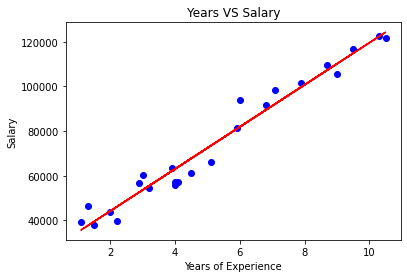

In [ ]:
#Training data VS Regression line
#Regression line is drawn using predicted values for training
set
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Years VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#import libraries
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [ ]:
#model evaluation for training set
y_train_predict = linear_regression.predict (X_train)
rmse = (np.sqrt(mean_squared_error (y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5205.982110155719
R2 score is 0.9645401573418146




# New Section

In [ ]:
#model evaluation for testing set
y_test_predict=linear_regression.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2=r2_score(y_test, y_test_predict)
print("The model performance for testing set")
print("_____________________________________")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
_____________________________________
RMSE is 7059.04362190151
R2 score is 0.9024461774180497
